In [5]:
import torch
from torch.utils.data import DataLoader

from torch.utils.data import Dataset
from torch.autograd import Variable

import matplotlib.pyplot as plt

from dataloaders.dataset import VideoDataset
from dataloader.MixDataset import 


ImportError: cannot import name 'read_data_sets' from partially initialized module 'dataloader' (most likely due to a circular import) (C:\Users\whiwho\Anaconda3\envs\NeuralCompu\lib\site-packages\dataloader\__init__.py)

In [6]:
class MixedDataset(Dataset):
    def __init__(self, dataset = "hmdb51", split = "train", clip_len = 16):

        self.datasetA = VideoDataset(dataset=dataset, split=split, clip_len=clip_len, preprocess = False)
        if dataset == "kth":
            self.datasetB = VideoDataset(dataset=dataset + "_rbg_diff", split=split, clip_len=clip_len, preprocess = False)
        else:
            self.datasetB = VideoDataset(dataset=dataset + "_flow", split=split, clip_len=clip_len, preprocess = False)



    def __getitem__(self, index):
        xA, label = self.datasetA[index]
        xB, label_b = self.datasetB[index]
        
        if label != label_b:
            print(f"Label {label} contra {label_b} ")
            raise Exception()
            
        return (xA, xB), label
    
    def __len__(self):
        return len(self.datasetA)

In [9]:
train_dataloader = DataLoader( MixedDataset(dataset='hmdb51', split='train',clip_len=16 ), 
            batch_size=4, shuffle=True
            )

Number of train videos: 3570
Number of train videos: 3570


In [75]:
img_dat = VideoDataset(dataset='kth', split='train',clip_len=32, preprocess = False)

Number of train videos: 191


In [76]:
class MyDataset(Dataset):
    def __init__(self, datasetA, datasetB):
        self.datasetA = datasetA
        self.datasetB = datasetB
        
    def __getitem__(self, index):
        xA, label = self.datasetA[index]
        xB, _ = self.datasetB[index]
        
        return xA, xB, label
    
    def __len__(self):
        return len(self.datasetA)

In [77]:
#dataset = MyDataset(flow_dat, img_dat)

train_dataloader = DataLoader(img_dat, batch_size=1, shuffle=True)

In [97]:
batch = next(iter(train_dataloader))

In [98]:
len(batch[0][1])

4

In [110]:
img, img_f = batch[0][0][3], batch[0][1][3]

In [111]:
img = img.transpose(0,1)
img = img.transpose(1,3)
img = img.transpose(1,2)
img += 102

img.shape

img_f = img_f.transpose(0,1)
img_f = img_f.transpose(1,3)
img_f = img_f.transpose(1,2)
img_f += 102

img /= 255
img_f /= 255

print(f"Min of {torch.min(img)}")
print(f"Max of {torch.max(img)}")

print("--------------")

print(f"Min of {torch.min(img_f)}")
print(f"Max of {torch.max(img_f)}")
print(f"La diff es {torch.max(img_f) - torch.min(img_f) }")
#img_f = (img_f - torch.min(img_f)) / (torch.max(img_f) - torch.min(img_f) + 0.0001)

print(f"Min of {torch.min(img)}")
print(f"Min of flow {torch.min(img_f)}")
img.shape

Min of 0.0
Max of 1.0
--------------
Min of 0.0
Max of 1.0
La diff es 1.0
Min of 0.0
Min of flow 0.0


torch.Size([16, 112, 112, 3])

In [112]:
print(f"Min of {torch.min(img_f)}")
print(f"Max of {torch.max(img_f)}")

Min of 0.0
Max of 1.0


<Figure size 1440x2160 with 0 Axes>

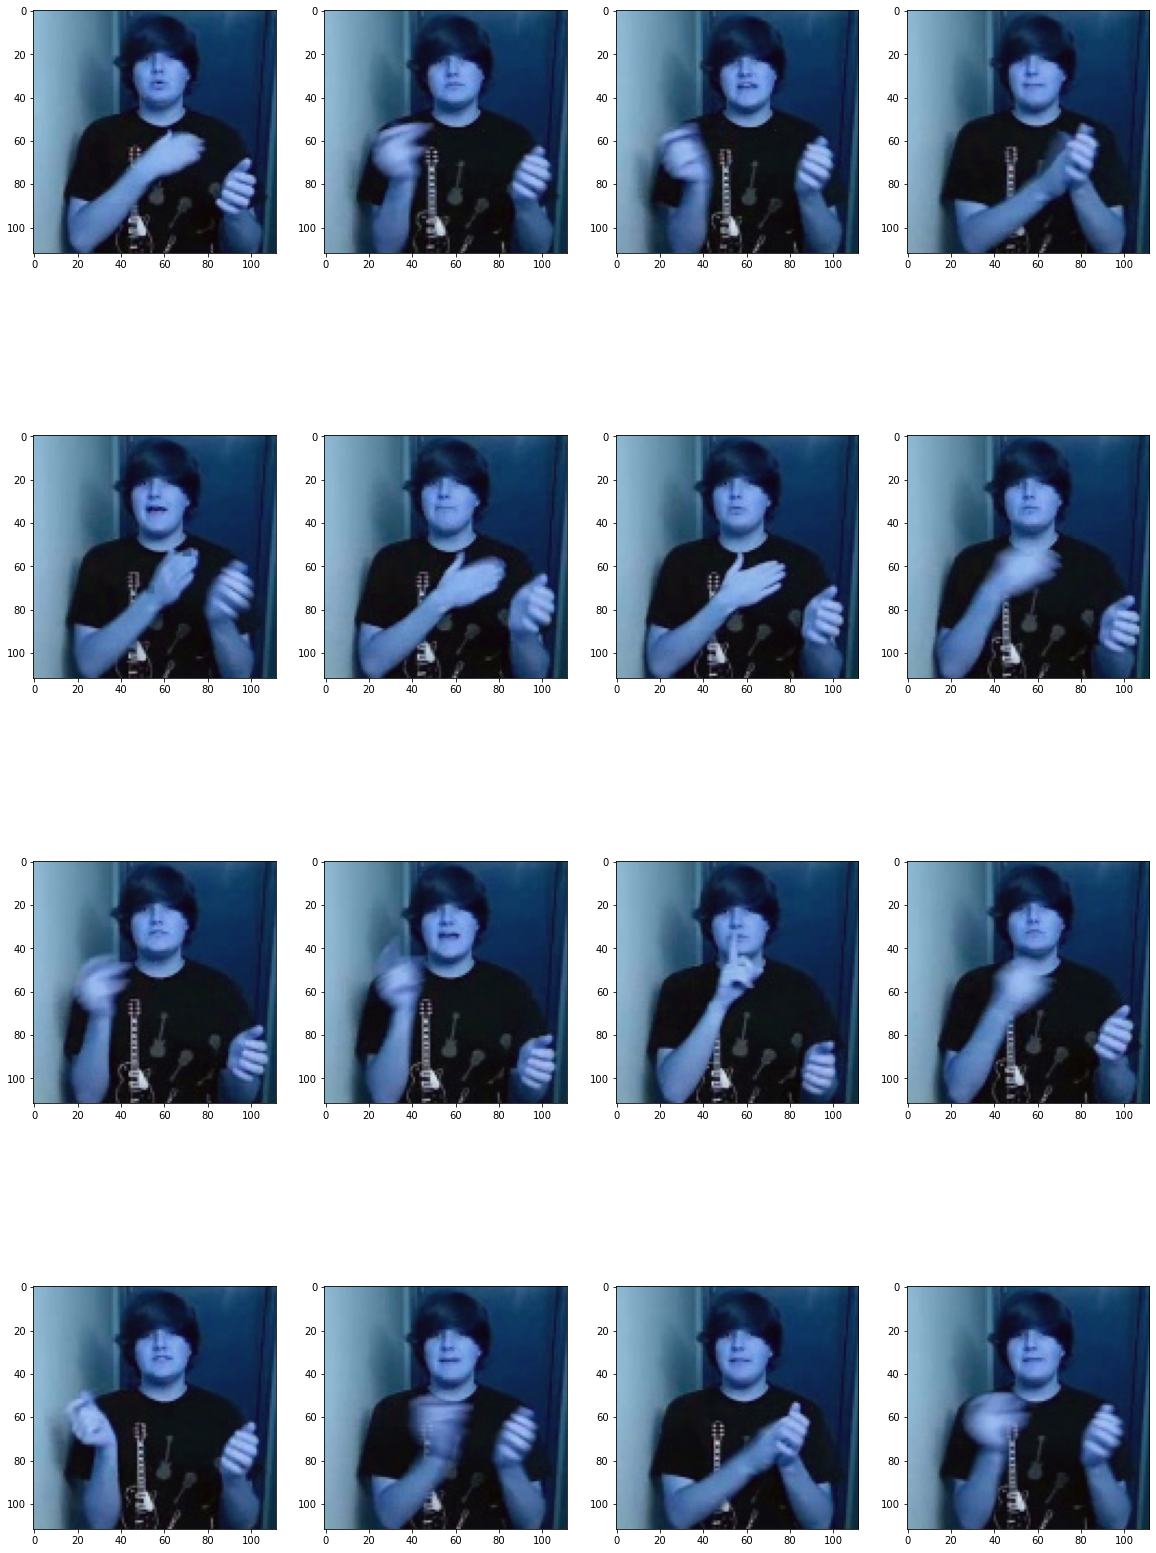

In [113]:
plt.figure()
plt.rcParams["figure.figsize"] = (20,30)
f, axarr = plt.subplots(4,4) 
for i in range(4):
    for j in range(4):
        axarr[i,j].imshow(img[i*4+j])

In [114]:
img_f[0]

tensor([[[0.5490, 0.5176, 0.5020],
         [0.5490, 0.5176, 0.5020],
         [0.5490, 0.5176, 0.5020],
         ...,
         [0.5451, 0.5137, 0.4980],
         [0.5451, 0.5137, 0.4980],
         [0.5451, 0.5137, 0.4980]],

        [[0.5490, 0.5176, 0.5020],
         [0.5490, 0.5176, 0.5020],
         [0.5490, 0.5176, 0.5020],
         ...,
         [0.5451, 0.5137, 0.4980],
         [0.5451, 0.5137, 0.4980],
         [0.5451, 0.5137, 0.4980]],

        [[0.5490, 0.5176, 0.5020],
         [0.5490, 0.5176, 0.5020],
         [0.5490, 0.5176, 0.5020],
         ...,
         [0.5490, 0.5176, 0.5020],
         [0.5490, 0.5176, 0.5020],
         [0.5412, 0.5098, 0.4941]],

        ...,

        [[0.5412, 0.5176, 0.5020],
         [0.5412, 0.5176, 0.5020],
         [0.5412, 0.5176, 0.5020],
         ...,
         [0.5490, 0.5333, 0.4706],
         [0.5490, 0.5333, 0.4706],
         [0.5412, 0.5294, 0.4784]],

        [[0.5412, 0.5176, 0.5020],
         [0.5412, 0.5176, 0.5020],
         [0.

In [118]:
img_f[0][0][0][0]*255-102

tensor(38.)

<Figure size 1440x2160 with 0 Axes>

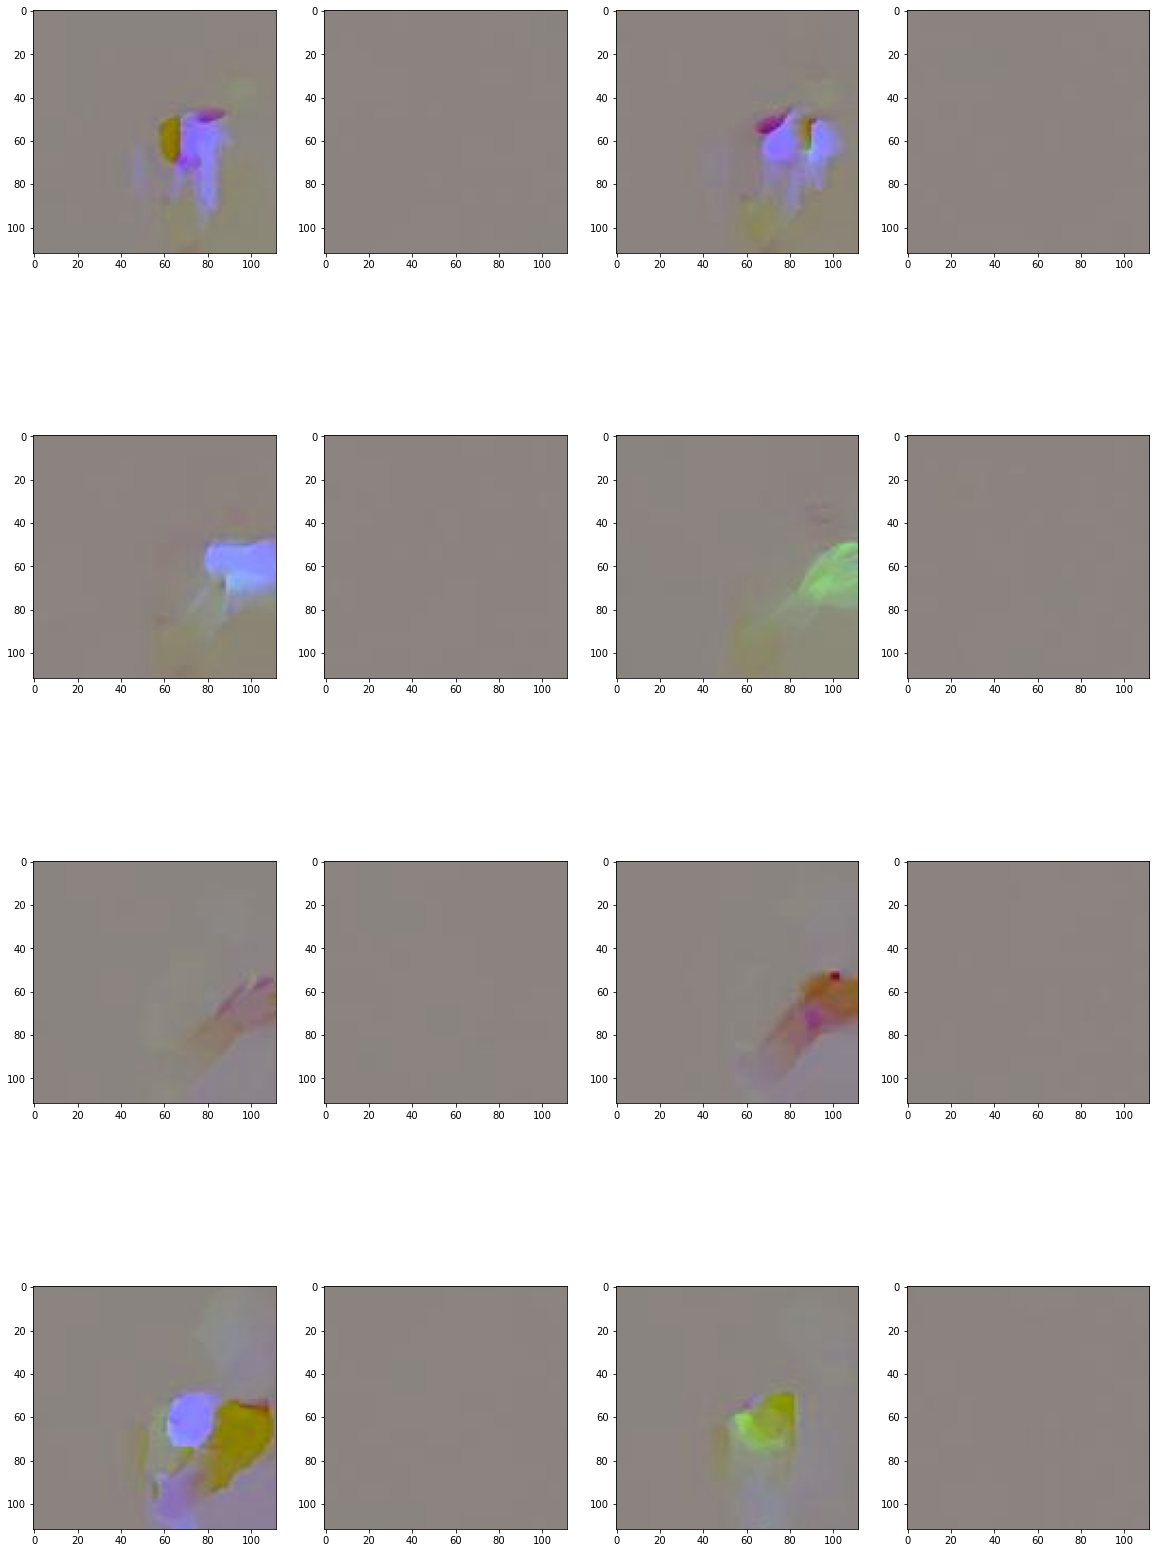

In [115]:
plt.figure()
plt.rcParams["figure.figsize"] = (20,30)
f, axarr = plt.subplots(4,4) 
for i in range(4):
    for j in range(4):
        axarr[i,j].imshow(img_f[i*4+j])

In [29]:
import numpy as np

In [57]:
caso = np.repeat(caso,2, axis=0)

In [58]:
caso.shape

torch.Size([4, 112, 112, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 216x432 with 0 Axes>

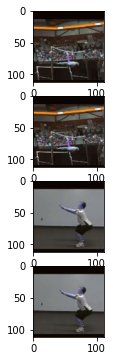

In [59]:
plt.figure()
plt.rcParams["figure.figsize"] = (3,6)
f, axarr = plt.subplots(caso.shape[0],1) 
for i in range(caso.shape[0]):
    axarr[i].imshow(caso[i]/255)

In [11]:
from norse.torch import ConstantCurrentLIFEncoder

In [81]:
case2 = case[1]/25

In [82]:
case2.shape

torch.Size([112, 112, 3])

4
4
4


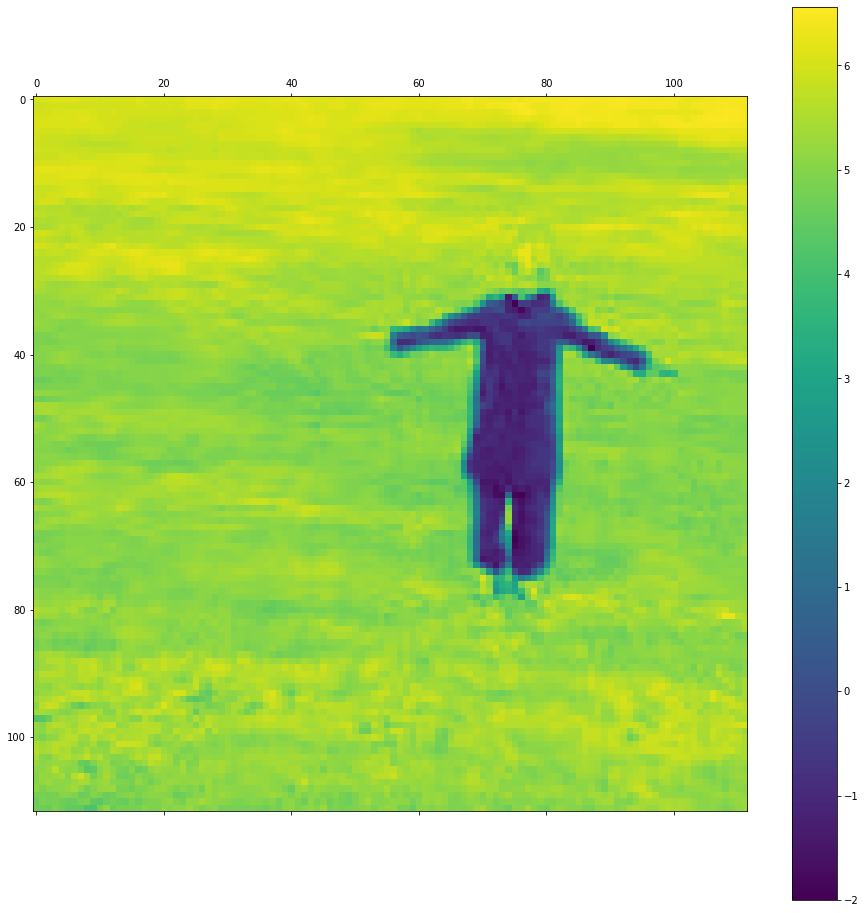

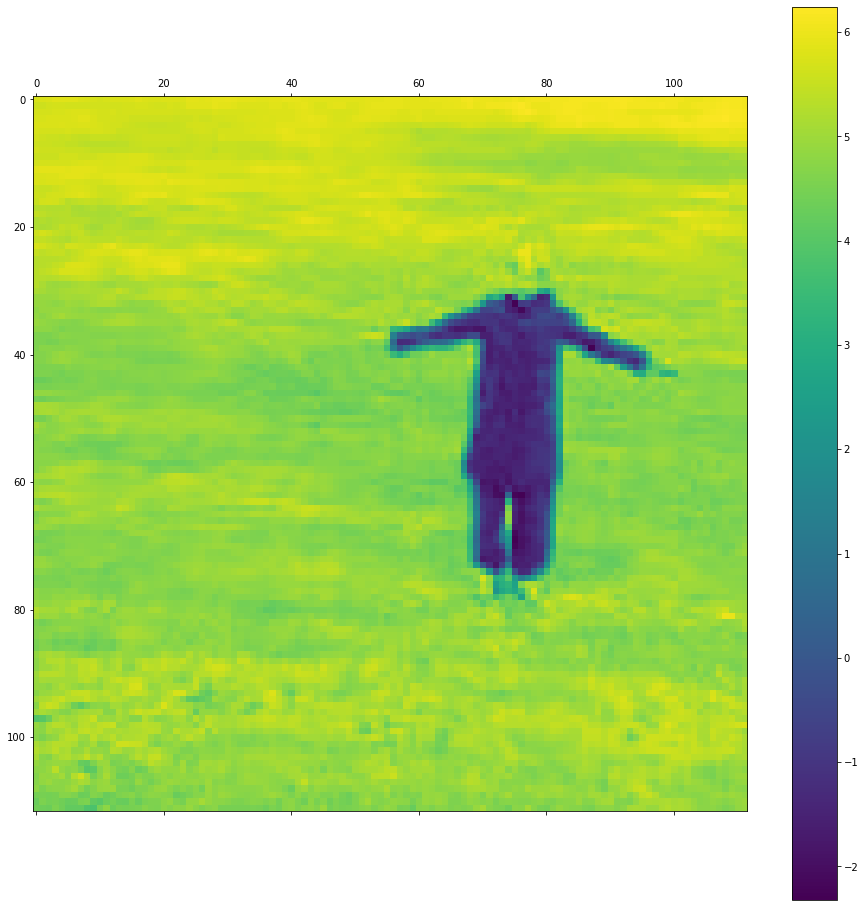

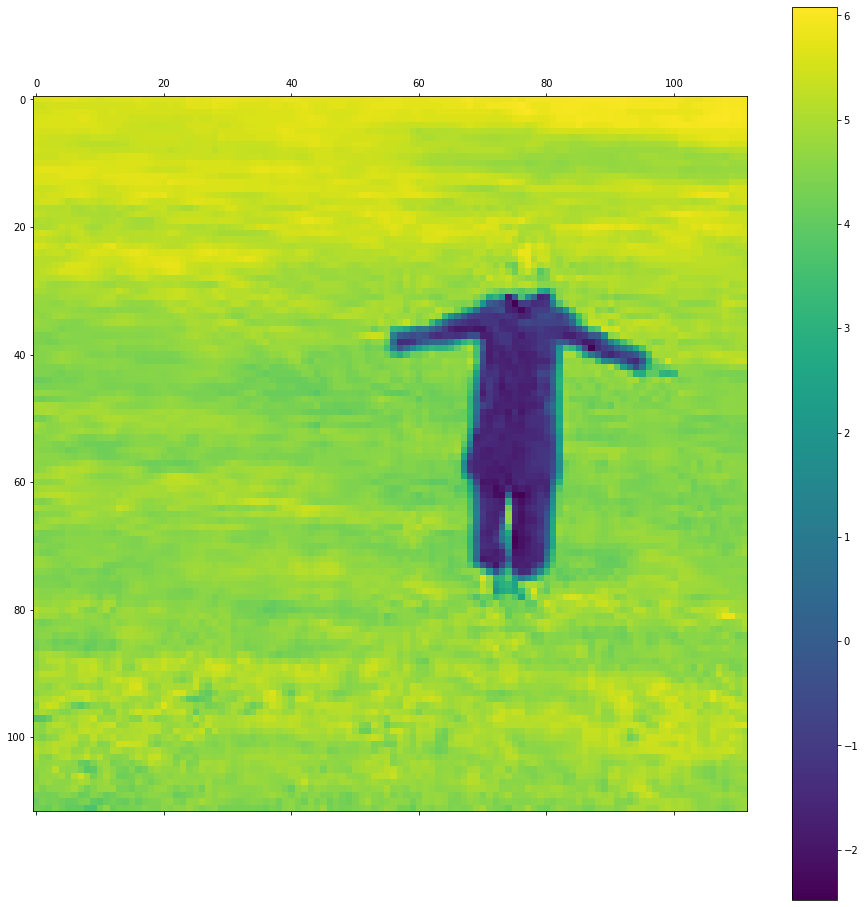

In [83]:
img, label = case2, 4
plt.matshow(img[:,:,0])
plt.colorbar()
print(label)
plt.matshow(img[:,:,1])
plt.colorbar()
print(label)
plt.matshow(img[:,:,2])
plt.colorbar()
print(label)

torch.Size([32, 112, 112])


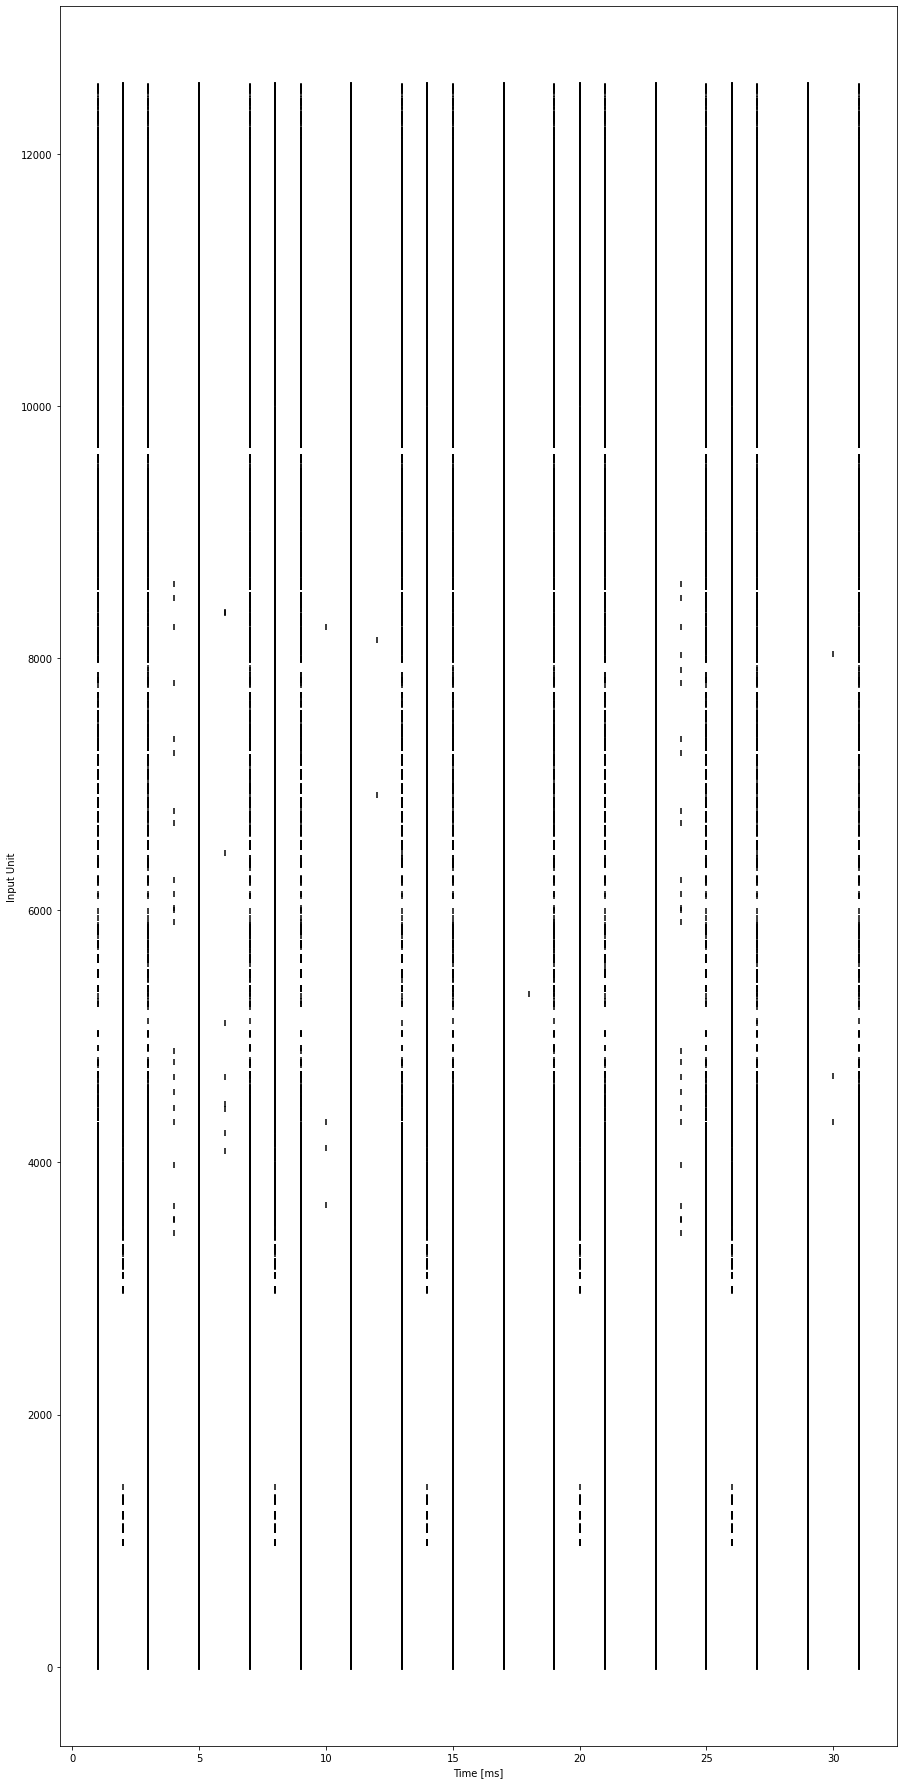

In [91]:
T = 32
example_encoder = ConstantCurrentLIFEncoder(T)


plt.rcParams["figure.figsize"] = (15,32)

example_input = example_encoder(img[:,:,0])
print(example_input.shape)
example_spikes = example_input.reshape(T,112*112).to_sparse().coalesce()
t = example_spikes.indices()[0]
n = example_spikes.indices()[1]

plt.scatter(t, n, marker='|', color='black')
plt.ylabel('Input Unit')
plt.xlabel('Time [ms]')
plt.show()

In [85]:
torch.mean(example_input)

tensor(0.3899)

## ConstantCurrentLIFEncoder Tests

torch.Size([64, 11])


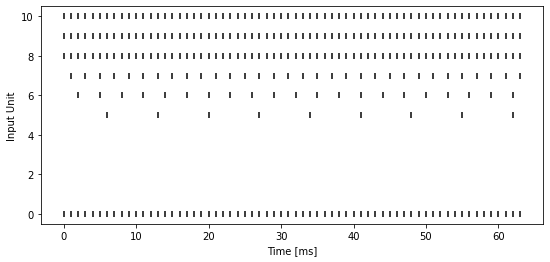

In [105]:
T = 64
example_encoder = ConstantCurrentLIFEncoder(T)

plt.rcParams["figure.figsize"] = (9,4)

data = [16, 0.1, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]

example_input = example_encoder(torch.as_tensor(data))
print(example_input.shape)
example_spikes = example_input.reshape(T,len(data)).to_sparse().coalesce()
t = example_spikes.indices()[0]
n = example_spikes.indices()[1]

plt.scatter(t, n, marker='|', color='black')
plt.ylabel('Input Unit')
plt.xlabel('Time [ms]')
plt.show()

In [1]:
import torch

In [8]:
data = [[[1,1,1],[3,1,1],[1,2,4]],[[2,4,5],[0,0,0],[9,0,0]]]


In [9]:
qq = torch.as_tensor(data)

In [10]:
torch.max(qq, 1)

torch.return_types.max(
values=tensor([[3, 2, 4],
        [9, 4, 5]]),
indices=tensor([[1, 2, 2],
        [2, 0, 0]]))

In [100]:
a = torch.zeros((2,256,3,1,1))
b = torch.zeros((2,256,3,1,1))

In [101]:
c = torch.cat((a,b), 1)

In [102]:
c.shape

torch.Size([2, 512, 3, 1, 1])